**Importing Essential Libraries**

In [0]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
import random

from google.colab.patches import cv2_imshow

from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.layers import Dense,Conv2D,AveragePooling2D,Flatten,Activation,MaxPool2D,Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam,SGD,RMSprop
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer,LabelEncoder 

from imutils import build_montages

sns.set()

**Importing dataset**

In [0]:
from keras.datasets import fashion_mnist

In [0]:
( (X_train, Y_train) , (X_test,Y_test) ) = fashion_mnist.load_data() 

In [0]:
outputs = X_test
outputs

In [310]:
print(X_train.shape)
print(type(X_train))
print(Y_train.shape)
print(type(Y_train))
print(X_test.shape)
print(type(X_test))
print(Y_test.shape)
print(type(Y_test))

print(outputs.shape)
print(type(outputs))

(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)
<class 'numpy.ndarray'>
(10000, 28, 28)
<class 'numpy.ndarray'>
(10000,)
<class 'numpy.ndarray'>
(10000, 28, 28)
<class 'numpy.ndarray'>


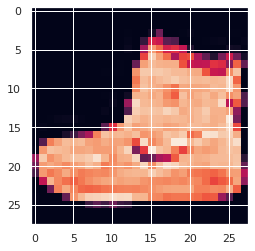

In [311]:
plt.imshow(X_train[0])

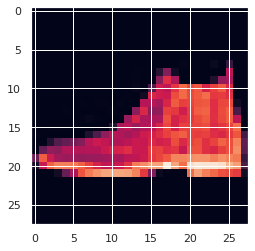

In [312]:
plt.imshow(X_test[0])

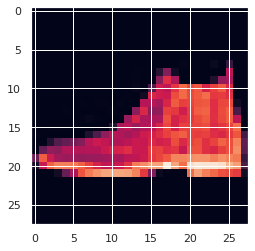

In [313]:
plt.imshow(outputs[0])

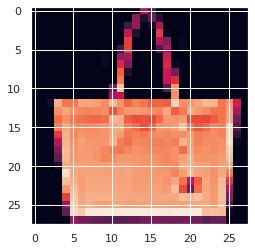

In [314]:
plt.imshow(X_test[7000])

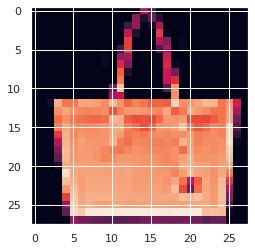

In [315]:
plt.imshow(outputs[7000])

**Data Pre-processing**

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28 , 28 , 1)
X_test = X_test.reshape(X_test.shape[0], 28 , 28 , 1)

In [317]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [318]:
X_train.dtype

dtype('uint8')

In [0]:
X_train = np.array(X_train , dtype='float') / 255.0
X_test = np.array(X_test , dtype='float') / 255.0

In [320]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
X_train[0]

In [0]:
lb = LabelBinarizer()

In [0]:
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [324]:
lb.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [325]:
Y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [326]:
Y_train.shape

(60000, 10)

In [0]:

labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

**CNN Model**

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [329]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 64)         

In [0]:
NUM_EPOCHS = 50
INIT_LR = 0.01
BS = 32

In [0]:
opt = SGD(learning_rate=INIT_LR)

In [0]:
model.compile(loss="categorical_crossentropy", optimizer=opt , metrics=["accuracy"])

In [333]:
H = model.fit(X_train , Y_train , validation_data=(X_test,Y_test), batch_size=BS , epochs=NUM_EPOCHS)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 187us/step - loss: 0.9044 - accuracy: 0.6624 - val_loss: 0.5570 - val_accuracy: 0.7947
Epoch 2/50
60000/60000 [==============================] - 11s 182us/step - loss: 0.5643 - accuracy: 0.7910 - val_loss: 0.4560 - val_accuracy: 0.8336
Epoch 3/50
60000/60000 [==============================] - 11s 182us/step - loss: 0.4863 - accuracy: 0.8211 - val_loss: 0.4108 - val_accuracy: 0.8528
Epoch 4/50
60000/60000 [==============================] - 11s 182us/step - loss: 0.4420 - accuracy: 0.8381 - val_loss: 0.3862 - val_accuracy: 0.8591
Epoch 5/50
60000/60000 [==============================] - 11s 182us/step - loss: 0.4140 - accuracy: 0.8474 - val_loss: 0.3621 - val_accuracy: 0.8665
Epoch 6/50
60000/60000 [==============================] - 11s 183us/step - loss: 0.3929 - accuracy: 0.8553 - val_loss: 0.3517 - val_accuracy: 0.8690
Epoch 7/50
60000/60000 [==============================] 

In [334]:
predictions = model.predict(X_test)
predictions

array([[1.11570683e-11, 2.29492342e-13, 1.27297235e-11, ...,
        4.01174475e-06, 1.61791570e-11, 9.99992847e-01],
       [4.13051224e-04, 8.65168293e-09, 9.98317122e-01, ...,
        2.75808987e-10, 4.11008074e-07, 1.21382004e-09],
       [2.59634727e-11, 1.00000000e+00, 2.29129324e-12, ...,
        8.76273338e-14, 1.06650192e-12, 6.27465419e-13],
       ...,
       [5.48493304e-08, 8.49312374e-12, 6.17671745e-08, ...,
        6.83202939e-10, 9.99999762e-01, 3.37868233e-10],
       [4.74130846e-10, 1.00000000e+00, 1.69419381e-10, ...,
        7.34823920e-12, 1.42834971e-11, 1.07439578e-11],
       [1.37484240e-05, 2.92772722e-08, 1.08584300e-06, ...,
        2.68481299e-03, 4.50937514e-04, 5.19319437e-05]], dtype=float32)

 **Classification Report & Accuracy-Loss Tradeoff Curve**

In [335]:
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1), target_names=labelNames))

              precision    recall  f1-score   support

         top       0.87      0.90      0.88      1000
     trouser       0.99      0.99      0.99      1000
    pullover       0.89      0.91      0.90      1000
       dress       0.93      0.93      0.93      1000
        coat       0.88      0.90      0.89      1000
      sandal       0.99      0.99      0.99      1000
       shirt       0.82      0.76      0.79      1000
     sneaker       0.97      0.96      0.97      1000
         bag       0.98      0.99      0.99      1000
  ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



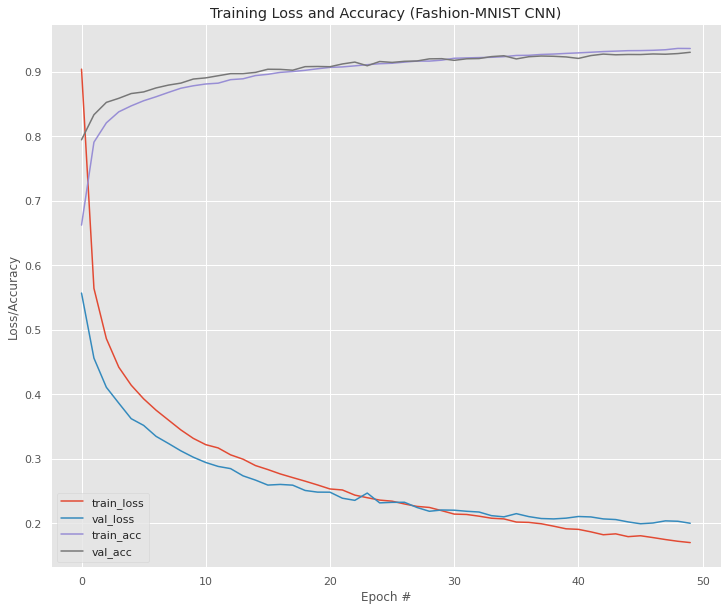

In [336]:

# plot the training loss and accuracy

N = np.arange(0, NUM_EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(12,10))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Fashion-MNIST CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

**Saving Model**

In [0]:
model.save('fashion_mnist_final.model')

In [0]:
from google.colab import files
files.download('fashion_mnist_final.model')

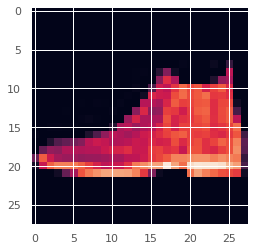

In [341]:
plt.imshow(outputs[0])

**Creating Output Montages for 16 Images in Test set**

In [342]:
indexes = np.random.randint(0 , 9999 , 16)
indexes

array([2797, 4129, 9079, 5796, 8208, 6000, 6774, 4916, 5764,  802, 7384,
       4721, 7366,  174, 1067, 9688])

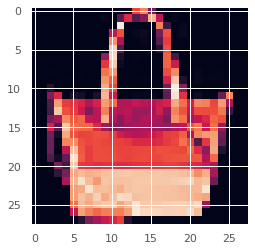

In [343]:
plt.imshow(outputs[indexes[0]])

In [0]:
i_vals = []

for idx in indexes:
  val = predictions.argmax(axis=1)[idx]
  i_vals.append(val)



In [345]:
print(i_vals)

[8, 9, 1, 6, 8, 1, 2, 6, 6, 8, 1, 5, 9, 2, 5, 8]


In [0]:
labels = []

for val in i_vals:
  label = labelNames[val]
  labels.append(label)


In [347]:
print(labels)

['bag', 'ankle boot', 'trouser', 'shirt', 'bag', 'trouser', 'pullover', 'shirt', 'shirt', 'bag', 'trouser', 'sandal', 'ankle boot', 'pullover', 'sandal', 'bag']


In [0]:

values = []

for i in indexes:
  val = np.amax(predictions , axis=1)[i]
  values.append(val)


In [349]:
print(values)

[1.0, 0.9999895, 1.0, 0.629203, 0.96943206, 0.9999945, 0.8442393, 0.53045386, 0.7999347, 0.9999937, 1.0, 1.0, 0.9999999, 0.99615365, 1.0, 1.0]


In [350]:
values =  [i * 100 for i in values]
values

[100.0,
 99.99895095825195,
 100.0,
 62.92030215263367,
 96.94320559501648,
 99.99945163726807,
 84.42392945289612,
 53.04538607597351,
 79.99346852302551,
 99.99936819076538,
 100.0,
 100.0,
 99.99998807907104,
 99.61536526679993,
 100.0,
 100.0]

In [351]:
values = [round(num, 2) for num in values]
values

[100.0,
 100.0,
 100.0,
 62.92,
 96.94,
 100.0,
 84.42,
 53.05,
 79.99,
 100.0,
 100.0,
 100.0,
 100.0,
 99.62,
 100.0,
 100.0]

In [0]:
images = []

for i in indexes:
  image = ( X_test[i] * 255 ).astype("uint8")
  images.append(image)


In [0]:
#make channels_last = 3

for i in range(16):
  images[i] = cv2.merge([images[i]] * 3)

In [354]:
images[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [355]:
images[0].shape

(28, 28, 3)

In [356]:
images[0].dtype

dtype('uint8')

In [0]:
results = []

for i in range(16):
  text = labels[i]+" : "+str(values[i])
  images[i] = cv2.resize(images[i], (300,300))
  cv2.putText(images[i], text , (10,50), cv2.FONT_HERSHEY_SIMPLEX, 0.7 , (0,255,0), 2)
  results.append(images[i])


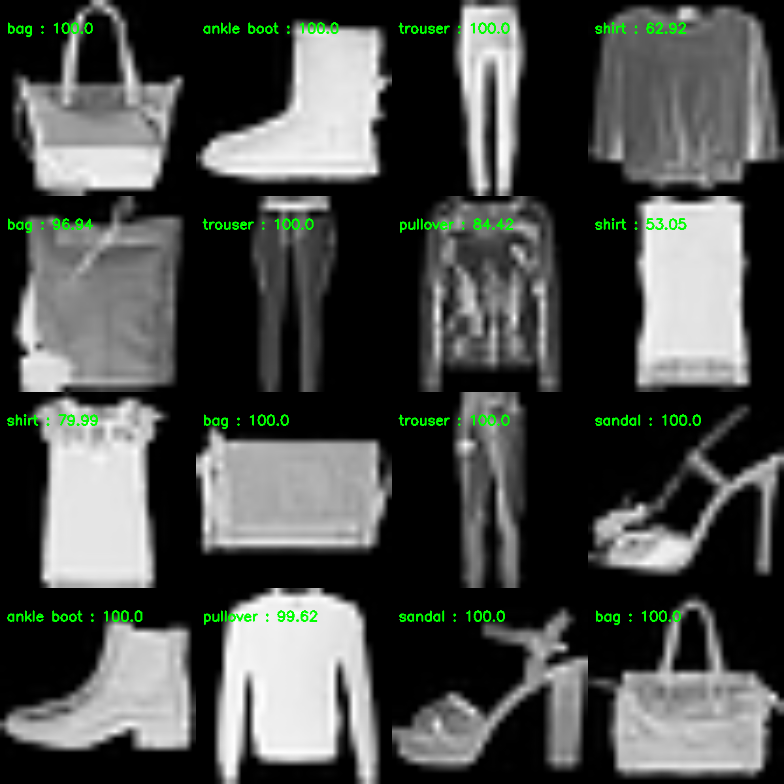

-1

In [358]:
montage = build_montages(results, (196, 196), (4, 4))[0]
# show the output montage
cv2_imshow(montage)
cv2.waitKey(0)